## Data Mining and Machine Learning
### Clasification using Neural Networks and Deep Learning
#### Edgar Acuna 
#### Noviembre 2019

In [5]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

#### Example 1. Neural Nets applied to the prediction of the final grade based on the first two exams: E1 and E2

In [6]:
#df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df=pd.read_csv("c://PW-PR/eje1dis.csv")

In [7]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X1)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X1= scaler.transform(X1)

In [8]:
#Training a neural net with one hidden layer containing 5 units
mlp = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=5, learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [9]:
#Showing  the weights
mlp.coefs_

[array([[-1.92820890e+01, -2.19841893e-02,  4.66104299e+01,
         -1.21213273e+01, -1.66590970e+01],
        [ 9.29642622e+01, -3.73196971e-01,  4.15511688e+01,
         -1.23324663e+01, -3.20026866e+00]]), array([[-7.18512710e-04],
        [ 9.44033864e-01],
        [ 1.11428608e-02],
        [ 1.96766347e+00],
        [-1.39397670e+00]])]

In [10]:
#Showing the biases
mlp.intercepts_

[array([-7.47131343,  0.45692388,  1.40025247, -0.1631193 ,  0.57265452]),
 array([-51.63764171])]

In [11]:
#Calculating the posterior probabilities
mlp.predict_proba(X1)

array([[0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [2.22044605e-16, 1.00000000e+00],
       [2.44249065e-15, 1.00000000e+00],
       [5.84499338e-10, 9.99999999e-01],
       [1.03206332e-12, 1.00000000e+00],
       [3.92151844e-09, 9.99999996e-01],
       [2.20098391e-08, 9.99999978e-01],
       [1.10263353e-07, 9.99999890e-01],
       [5.65724556e-09, 9.99999994e-01],
       [8.18338161e-04, 9.99181662e-01],
       [1.65178689e-03, 9.98348213e-01],
       [2.30747643e-10, 1.00000000e+00],
       [1.06037401e-10, 1.00000000e+00],
       [3.11151665e-01, 6.88848335e-01],
       [8.11610808e-06, 9.99991884e-01],
       [3.51427264e-06, 9.99996486e-01],
       [2.62681737e-02, 9.73731826e-01],
       [1.15009104e-04, 9.99884991e-01],
       [1.78336739e-01, 8.21663261e-01],
       [2.22541411e-02, 9.77745859e-01],
       [1.61044191e-04, 9.99838956e-01],
       [5.06839017e-07, 9.99999493e-01],
       [9.933608

In [12]:
#Calculating the prediction matrix
pred=mlp.predict(X1)
print(confusion_matrix(y,pred))

[[ 8  0]
 [ 0 24]]


In [13]:
#Calculating the number of errors
error=(y!=pred).sum()
print( "Este es el numero de errores=", error)

Este es el numero de errores= 0


In [14]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           f       1.00      1.00      1.00         8
           p       1.00      1.00      1.00        24

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



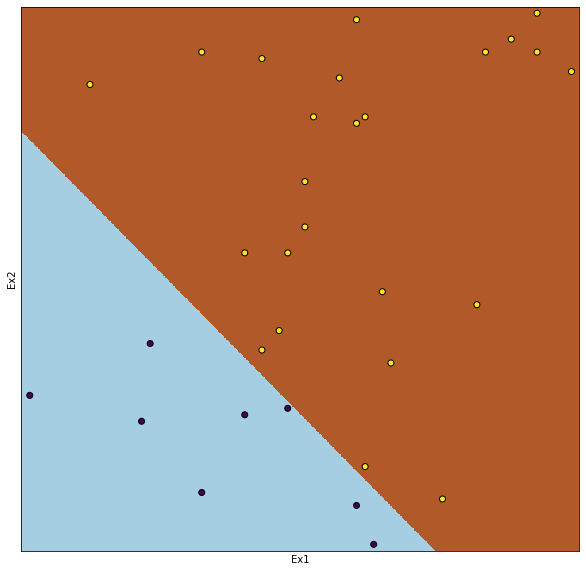

In [15]:
#Visualizando la fromtera de decision
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(solver="lbfgs",hidden_layer_sizes=(5),max_iter=1000,random_state=99)
mlp.fit(X1, y1) 
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=mlp.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [16]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.825


In [17]:
#Training a neural net with two hidden layers containing 5 units each of them
mlp2 = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5,5),max_iter=1000,random_state=99)
mlp2.fit(X1, y) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=99, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [18]:
#Showing  the weights
mlp2.coefs_

[array([[-0.23049524, -0.02207448,  0.63049713, -0.64444712,  0.36133947],
        [-0.39755451, -0.37472974, -0.81520733,  1.16250735, -0.9975528 ]]),
 array([[-0.16196165,  0.52198852,  0.36004258, -0.62957092,  0.28294691],
        [-0.44665223,  0.084192  , -0.32181481,  0.48976489,  0.50820058],
        [-0.43132982,  0.14973231, -0.62677501, -0.13685051, -0.6418174 ],
        [-0.55149494, -0.49373762,  0.0625446 , -0.65435683, -0.45661181],
        [-0.76444363,  0.58263972,  0.0809211 , -0.51503376,  0.65182766]]),
 array([[ 0.66983668],
        [-0.0825381 ],
        [ 0.94532955],
        [-0.06752363],
        [-0.30298109]])]

In [19]:
#Showing  the biases
mlp2.intercepts_

[array([ 0.49242105,  0.45692388, -0.22506937, -0.00865967,  0.7918344 ]),
 array([ 0.06520198, -0.71764652,  0.03837523,  0.21710789,  0.4598108 ]),
 array([0.11201181])]

The model has 51 parameters

In [20]:
#Calculating the prediction matrix
pred=mlp2.predict(X1)
print(confusion_matrix(y,pred))

[[ 3  5]
 [ 2 22]]


There are 7 errors

In [21]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.8583333333333332


### Example 2. Nnets applied to Diabetes

In [22]:
#url= "http://academic.uprm.edu/eacuna/diabetes.dat"
url="c://PW-PR/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names)
print(data.shape)
data.head()

(768, 9)


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [23]:
y=data['class']
X=data.iloc[:,0:8]
X_train, X_test, y_train, y_test = train_test_split(X, y)
y1=y.as_matrix()
X1=X.as_matrix()
#scaler = StandardScaler()
#scaler.fit(X_train)
#StandardScaler(copy=True, with_mean=True, with_std=True)
#X_train= scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [24]:
#training a NN with one hidden layer and 20 units
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [25]:
#mlp.coefs_

In [26]:
#mlp.intercepts_

In [27]:
pred=mlp.predict(X_test)

In [28]:
#Estimacion del error usando Training y test datasets
mlp.score(X_test, y_test)

0.7291666666666666

In [29]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.81      0.79       123
           2       0.63      0.58      0.61        69

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.72      0.73      0.73       192



In [30]:
#Estimating the accuracy using cross validation( 20 neurons)
from sklearn.model_selection import cross_val_score
mlp=MLPClassifier(hidden_layer_sizes=(20),max_iter=500)
mlp.fit(X_train, y_train) 
scores = cross_val_score(mlp, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.6758202323991798


#### The overfitting problem in Neural Nets 

In [41]:
#Training a NN with one hidden layer and 20 units
mlp1=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(5),max_iter=5000,random_state=90)
mlp1.fit(X1, y1) 
mlp1.score(X1, y1)

0.4830729166666667

In [43]:
#Training a NN with one hidden layer and 20 units
mlp2=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),max_iter=5000)
mlp2.fit(X1, y1) 
mlp2.score(X1, y1)

0.66015625

In [44]:
#Training a NN with one hidden layer and 50 units
mlp3=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(50),max_iter=5000)
mlp3.fit(X1, y1) 
mlp3.score(X1, y1)

0.6510416666666666

In [52]:
#Training a NN with one hidden layer and 100 units
mlp4=MLPClassifier(hidden_layer_sizes=(500),max_iter=5000)
mlp4.fit(X1, y1) 
mlp4.score(X1, y1)

0.7395833333333334

In [35]:
#Training a NN with one hidden layer and 200 units
mlp5=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp5.fit(X1, y1) 
mlp5.score(X1, y1)

0.6510416666666666

In [36]:
#Training a NN with one hidden layer and 500 units
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(500),max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

1.0

In [37]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty .1
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=.1,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.5546875

In [38]:
#Training a NN with one hidden layer and 20 units, weight decay with penalty 5
mlp6=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20),alpha=5,max_iter=5000)
mlp6.fit(X1, y1) 
mlp6.score(X1, y1)

0.6510416666666666

In [39]:
#training a NN with two hidden layer and 20 units in each of them
mlp22=MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,20),max_iter=5000)
mlp22.fit(X1, y1) 
mlp22.score(X1, y1)

0.6510416666666666

In [40]:
#Estimating the accuracy using cross validation(5-neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp1, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())   

The accuracy estimated by CV is: 0.6211893369788106


In [52]:
#Estimating the accuracy using cross validation(20 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp2, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.66026999316473


In [53]:
#Estimating the accuracy using cross validation(50 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp3, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6172932330827068


In [54]:
#Estimating the accuracy using cross validation(100 neurons)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp4, X1, y1, cv=10)
print ('The accuracy estimated by CV is:', scores.mean())  

The accuracy estimated by CV is: 0.6379186602870813


### Example 3. Nnet  applied to Landsat 

In [55]:
#Cargando el conjunto de datos Landsat
#url='http://academic.uprm.edu/eacuna/landsat.txt'
url='c://PW-PR/landsat.data'
data = pd.read_table(url, header=None,delim_whitespace=True)
y=data.iloc[:,36]
X=data.iloc[:,0:36]
#y1=y.as_matrix()
#X1=X.as_matrix()
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
#Holdout estimacion of teh accuracy  with  3 layers and 50 nuronss in each of them
X_train, X_test, y_train, y_test = train_test_split(X, y)
mlp=MLPClassifier(hidden_layer_sizes=(50,50,50),max_iter=500)
mlp.fit(X_train, y_train) 
mlp.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [57]:
pred=mlp.predict(X_test)
print(confusion_matrix(y_test, pred))

[[392   0   2   0   1   0]
 [  0 192   1   1   1   0]
 [  3   0 316   8   0  10]
 [  2   0  78  28   1  55]
 [ 16   3   2   1 148  10]
 [  0   0  46   6  10 276]]


In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.95      0.99      0.97       395
           2       0.98      0.98      0.98       195
           3       0.71      0.94      0.81       337
           4       0.64      0.17      0.27       164
           5       0.92      0.82      0.87       180
           7       0.79      0.82      0.80       338

    accuracy                           0.84      1609
   macro avg       0.83      0.79      0.78      1609
weighted avg       0.83      0.84      0.82      1609



### IV. Ejemplo de Deep Learning aplicado a Diabetes

In [41]:
import h2o
h2o.init(ip="localhost", port=54323)
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator, H2ODeepLearningEstimator
#h2o.connect()
#h2o.no_progress()

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\eacun\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\eacun\AppData\Local\Temp\tmpn7qvm5pf
  JVM stdout: C:\Users\eacun\AppData\Local\Temp\tmpn7qvm5pf\h2o_eacun_started_from_python.out
  JVM stderr: C:\Users\eacun\AppData\Local\Temp\tmpn7qvm5pf\h2o_eacun_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.27.0.4835
H2O cluster version age:,1 month and 4 days
H2O cluster name:,H2O_from_python_eacun_4afw4a
H2O cluster total nodes:,1
H2O cluster free memory:,3.526 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [42]:
diabetes = h2o.import_file("https://academic.uprm.edu/eacuna/diabetes.dat")
myx=['C1','C2','C3','C4','C5','C6','C7','C8']
diabetes['C9']=diabetes['C9'].asfactor()
myy="C9"
dl_model = H2ODeepLearningEstimator(hidden=[10,10],epochs=200)
dl_model.train(myx, myy, training_frame=diabetes)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [43]:
y_pred=dl_model.predict(diabetes)
print( (y_pred['predict']==diabetes['C9']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.7981770833333334]


In [44]:
dl_model.model_performance(diabetes)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.1369237857480298
RMSE: 0.3700321415066937
LogLoss: 0.42014264824885
Mean Per-Class Error: 0.19741791044776114
AUC: 0.8829104477611941
pr_auc: 0.7897276945169486
Gini: 0.7658208955223882

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4538041688384142: 


,,1,2,Error,Rate
0,1,394.0,106.0,0.212,(106.0/500.0)
1,2,49.0,219.0,0.1828,(49.0/268.0)
2,Total,443.0,325.0,0.2018,(155.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.453804,0.738617,189.0
1,max f2,0.198694,0.830671,285.0
2,max f0point5,0.709989,0.756705,107.0
3,max accuracy,0.709989,0.809896,107.0
4,max precision,0.999293,1.000000,0.0
5,max recall,0.031153,1.000000,376.0
6,max specificity,0.999293,1.000000,0.0
7,max absolute_mcc,0.453804,0.583824,189.0
8,max min_per_class_accuracy,0.477003,0.800000,182.0
9,max mean_per_class_accuracy,0.453804,0.802582,189.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 41.51 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.991917,2.865672,2.865672,1.000000,0.996965,1.000000,0.996965,0.029851,0.029851,186.567164,186.567164
1,,2,0.020833,0.978259,2.865672,2.865672,1.000000,0.985000,1.000000,0.990982,0.029851,0.059701,186.567164,186.567164
2,,3,0.031250,0.966858,2.865672,2.865672,1.000000,0.972086,1.000000,0.984684,0.029851,0.089552,186.567164,186.567164
3,,4,0.040365,0.961846,2.456290,2.773231,0.857143,0.964222,0.967742,0.980063,0.022388,0.111940,145.628998,177.323062
4,,5,0.050781,0.947212,2.149254,2.645235,0.750000,0.954540,0.923077,0.974828,0.022388,0.134328,114.925373,164.523536
5,,6,0.100260,0.888636,2.714847,2.679589,0.947368,0.919583,0.935065,0.947564,0.134328,0.268657,171.484682,167.958907
6,,7,0.151042,0.842567,2.204363,2.519815,0.769231,0.865132,0.879310,0.919850,0.111940,0.380597,120.436280,151.981472
7,,8,0.200521,0.781784,2.186960,2.437682,0.763158,0.812966,0.850649,0.893476,0.108209,0.488806,118.695994,143.768172
8,,9,0.300781,0.638934,1.563094,2.146152,0.545455,0.713579,0.748918,0.833510,0.156716,0.645522,56.309362,114.615236
9,,10,0.399740,0.494982,1.357423,1.950897,0.473684,0.567025,0.680782,0.767540,0.134328,0.779851,35.742341,95.089698


In [45]:
dl_model1 = H2ODeepLearningEstimator(hidden=[20,20,20],epochs=500,nfolds=10)
dl_model1.train(myx, myy, training_frame=diabetes)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [46]:
dl_model1.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1575394368751_5


Status of Neuron Layers: predicting C9, 2-class classification, bernoulli distribution, CrossEntropy loss, 1,062 weights/biases, 17.7 KB, 391,680 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,0,,,,,,,,,
1,,2,20,Rectifier,0,0,0,0.00111131,0.000497526,0,-0.00433038,0.415743,0.498604,0.120008
2,,3,20,Rectifier,0,0,0,0.00109151,0.000790119,0,-0.0190095,0.334787,1.05855,0.135883
3,,4,20,Rectifier,0,0,0,0.00228554,0.00247013,0,-0.026814,0.446023,1.00413,0.0785234
4,,5,2,Softmax,,0,0,0.00234022,0.000904126,0,-0.0883772,1.83224,-0.00475887,0.0505469




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.032270601816657266
RMSE: 0.17964020100372094
LogLoss: 0.10839104904731828
Mean Per-Class Error: 0.04025373134328358
AUC: 0.9941492537313432
pr_auc: 0.7760808411686019
Gini: 0.9882985074626864

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6417009378258823: 


,,1,2,Error,Rate
0,1,484.0,16.0,0.032,(16.0/500.0)
1,2,13.0,255.0,0.0485,(13.0/268.0)
2,Total,497.0,271.0,0.0378,(29.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.417009e-01,0.946197,148.0
1,max f2,3.549008e-01,0.967273,180.0
2,max f0point5,8.790829e-01,0.964052,116.0
3,max accuracy,6.417009e-01,0.962240,148.0
4,max precision,9.999984e-01,1.000000,0.0
5,max recall,2.060850e-01,1.000000,203.0
6,max specificity,9.999984e-01,1.000000,0.0
7,max absolute_mcc,6.417009e-01,0.917145,148.0
8,max min_per_class_accuracy,5.788142e-01,0.958000,155.0
9,max mean_per_class_accuracy,6.417009e-01,0.959746,148.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 37.73 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.029851,186.567164,186.567164
1,,2,0.020833,1.000000e+00,2.865672,2.865672,1.000000,1.000000e+00,1.000000,1.000000,0.029851,0.059701,186.567164,186.567164
2,,3,0.031250,9.999999e-01,2.865672,2.865672,1.000000,9.999999e-01,1.000000,1.000000,0.029851,0.089552,186.567164,186.567164
3,,4,0.040365,9.999991e-01,2.865672,2.865672,1.000000,9.999996e-01,1.000000,1.000000,0.026119,0.115672,186.567164,186.567164
4,,5,0.050781,9.999978e-01,2.865672,2.865672,1.000000,9.999985e-01,1.000000,1.000000,0.029851,0.145522,186.567164,186.567164
5,,6,0.100260,9.999687e-01,2.865672,2.865672,1.000000,9.999890e-01,1.000000,0.999994,0.141791,0.287313,186.567164,186.567164
6,,7,0.151042,9.994083e-01,2.865672,2.865672,1.000000,9.997777e-01,1.000000,0.999922,0.145522,0.432836,186.567164,186.567164
7,,8,0.200521,9.959238e-01,2.790259,2.847063,0.973684,9.984138e-01,0.993506,0.999550,0.138060,0.570896,179.025923,184.706338
8,,9,0.300781,9.078263e-01,2.828455,2.840861,0.987013,9.680847e-01,0.991342,0.989061,0.283582,0.854478,182.845513,184.086063
9,,10,0.399740,3.243087e-01,1.395130,2.482960,0.486842,6.529974e-01,0.866450,0.905866,0.138060,0.992537,39.512962,148.295979




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.19929246947742188
RMSE: 0.44642185147842156
LogLoss: 0.606844689478185
Mean Per-Class Error: 0.3012686567164179
AUC: 0.7564850746268657
pr_auc: 0.6049295567618337
Gini: 0.5129701492537313

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3104740486653735: 


,,1,2,Error,Rate
0,1,320.0,180.0,0.36,(180.0/500.0)
1,2,65.0,203.0,0.2425,(65.0/268.0)
2,Total,385.0,383.0,0.319,(245.0/768.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.310474,0.623656,236.0
1,max f2,0.066763,0.755712,353.0
2,max f0point5,0.525790,0.597994,158.0
3,max accuracy,0.649107,0.722656,121.0
4,max precision,0.998528,1.000000,0.0
5,max recall,0.008834,1.000000,396.0
6,max specificity,0.998528,1.000000,0.0
7,max absolute_mcc,0.451686,0.384680,185.0
8,max min_per_class_accuracy,0.364393,0.694030,212.0
9,max mean_per_class_accuracy,0.310474,0.698731,236.0



Gains/Lift Table: Avg response rate: 34.90 %, avg score: 38.78 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010417,0.983806,2.507463,2.507463,0.875000,0.990252,0.875000,0.990252,0.026119,0.026119,150.746269,150.746269
1,,2,0.020833,0.972429,1.791045,2.149254,0.625000,0.977082,0.750000,0.983667,0.018657,0.044776,79.104478,114.925373
2,,3,0.031250,0.963959,2.149254,2.149254,0.750000,0.968146,0.750000,0.978493,0.022388,0.067164,114.925373,114.925373
3,,4,0.040365,0.947685,2.046908,2.126143,0.714286,0.954821,0.741935,0.973148,0.018657,0.085821,104.690832,112.614348
4,,5,0.050781,0.933408,2.507463,2.204363,0.875000,0.939544,0.769231,0.966255,0.026119,0.111940,150.746269,120.436280
5,,6,0.100260,0.867600,1.659073,1.935259,0.578947,0.902317,0.675325,0.934701,0.082090,0.194030,65.907306,93.525877
6,,7,0.151042,0.812660,1.910448,1.926917,0.666667,0.839954,0.672414,0.902846,0.097015,0.291045,91.044776,92.691714
7,,8,0.200521,0.752707,1.659073,1.860826,0.578947,0.783713,0.649351,0.873450,0.082090,0.373134,65.907306,86.082574
8,,9,0.300781,0.565387,1.563094,1.761582,0.545455,0.651554,0.614719,0.799484,0.156716,0.529851,56.309362,76.158170
9,,10,0.399740,0.432123,1.244305,1.633526,0.434211,0.502214,0.570033,0.725893,0.123134,0.652985,24.430479,63.352618




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.7274259,0.09656878,0.72602737,0.6923077,0.68,0.7625,0.8356164,0.7866667,0.7446808,0.5,0.8356164,0.7108434
1,auc,0.77701837,0.073005095,0.83984965,0.7781065,0.7545593,0.7913101,0.8868093,0.8125937,0.75608546,0.64492756,0.8269565,0.67898554
2,err,0.27257413,0.09656878,0.2739726,0.30769232,0.32,0.2375,0.16438356,0.21333334,0.25531915,0.5,0.16438356,0.28915662
3,err_count,20.7,6.2191463,20.0,24.0,24.0,19.0,12.0,16.0,24.0,32.0,12.0,24.0
4,f0point5,0.6235626,0.10572599,0.6903766,0.5670103,0.5896226,0.6886228,0.7,0.71005917,0.63583815,0.4047619,0.73913044,0.5102041
5,f1,0.6782543,0.08893803,0.76744187,0.64705884,0.6756757,0.7076923,0.7777778,0.75,0.64705884,0.5151515,0.73913044,0.5555556
6,f2,0.7521891,0.08339935,0.8638743,0.75342464,0.79113925,0.7278481,0.875,0.794702,0.65868264,0.7083333,0.73913044,0.6097561
7,lift_top_group,1.4006939,1.5124822,2.0857143,0.0,0.0,2.580645,3.3181818,0.0,2.8484848,0.0,3.173913,0.0
8,logloss,0.6067096,0.13591291,0.4893172,0.5736967,0.77025867,0.6650387,0.400934,0.54265386,0.5710238,0.7679288,0.49334592,0.7928985
9,max_per_class_error,0.36339313,0.13984312,0.47368422,0.3846154,0.44680852,0.2580645,0.21568628,0.23913044,0.33333334,0.67391306,0.26086956,0.3478261



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2019-12-03 12:33:08,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2019-12-03 12:33:08,11.316 sec,207567 obs/sec,10.0,1,7680.0,0.384465,0.457812,0.349375,0.858799,0.748732,2.507463,0.210938
2,,2019-12-03 12:33:09,12.932 sec,239266 obs/sec,510.0,51,391680.0,0.179640,0.108391,0.857955,0.994149,0.776081,2.865672,0.037760



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C8,1.000000,1.000000,0.147586
1,C6,0.956434,0.956434,0.141156
2,C5,0.922440,0.922440,0.136139
3,C3,0.920993,0.920993,0.135925
4,C4,0.785756,0.785756,0.115966
5,C2,0.771014,0.771014,0.113791
6,C7,0.761443,0.761443,0.112378
7,C1,0.657648,0.657648,0.097059


<bound method H2OBinomialModel.confusion_matrix of >

### V . Ejemplo de deep Learning aplicado a Shuttle

In [47]:
shuttle = h2o.import_file("https://academic.uprm.edu/eacuna/shuttle.trn")
myx=['C1','C2','C3','C4','C5','C6','C7','C8','C9']
shuttle['C10']=shuttle['C10'].asfactor()
myy="C10"
dl_model = H2ODeepLearningEstimator(hidden=[10,20],epochs=200,nfolds=10)
dl_model.train(myx, myy, training_frame=shuttle)

Parse progress: |█████████████████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [48]:
y_pred=dl_model.predict(shuttle)
print ((y_pred['predict']==shuttle['C10']).mean())

deeplearning prediction progress: |███████████████████████████████████████| 100%
[0.9994022988505747]


In [49]:
dl_model.model_performance(shuttle)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.0005686756628177027
RMSE: 0.023846921453674112
LogLoss: 0.007363162128960879
Mean Per-Class Error: 0.07077650354225073

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34105.0,0.0,1.0,0.0,0.0,0.0,2.0,0.000088,"3 / 34,108"
1,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 37
2,8.0,0.0,123.0,1.0,0.0,0.0,0.0,0.068182,9 / 132
3,1.0,2.0,0.0,6742.0,2.0,1.0,0.0,0.000889,"6 / 6,748"
4,1.0,1.0,2.0,0.0,2453.0,1.0,0.0,0.002034,"5 / 2,458"
5,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.333333,2 / 6
6,1.0,0.0,0.0,0.0,0.0,0.0,10.0,0.090909,1 / 11
7,34116.0,40.0,126.0,6743.0,2457.0,6.0,12.0,0.000598,"26 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.999402
1,2,0.999885
2,3,0.999954
3,4,0.999954
4,5,0.999977
5,6,0.999977
6,7,1.000000


In [50]:
dl_model.confusion_matrix

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1575394368751_93


Status of Neuron Layers: predicting C10, 7-class classification, multinomial distribution, CrossEntropy loss, 467 weights/biases, 10.4 KB, 8,800,745 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,9,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.156104,0.282102,0,-0.0810835,1.1007,0.401979,1.30571
2,,3,20,Rectifier,0,0,0,0.158136,0.275005,0,0.00310724,0.702025,0.445057,0.987955
3,,4,7,Softmax,,0,0,0.569894,0.467123,0,-1.65547,2.07433,-1.36031,0.666503




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.00041999189320259255
RMSE: 0.020493703745360244
LogLoss: 0.0026500954158618323
Mean Per-Class Error: 0.01150567335015798

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,7978.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,"0 / 7,978"
1,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 7
2,2.0,0.0,24.0,0.0,0.0,0.0,0.0,0.076923,2 / 26
3,0.0,0.0,0.0,1539.0,0.0,0.0,0.0,0.000000,"0 / 1,539"
4,0.0,0.0,1.0,0.0,551.0,1.0,0.0,0.003617,2 / 553
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.000000,0 / 2
6,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.000000,0 / 2
7,7980.0,7.0,25.0,1539.0,551.0,3.0,2.0,0.000396,"4 / 10,107"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.999604
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.0011204713363510966
RMSE: 0.03347344225428715
LogLoss: 0.014622888129162659
Mean Per-Class Error: 0.20975136553490942

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,1,2,3,4,5,6,7,Error,Rate
0,34102.0,0.0,3.0,0.0,1.0,0.0,2.0,0.000176,"6 / 34,108"
1,2.0,28.0,0.0,2.0,5.0,0.0,0.0,0.243243,9 / 37
2,11.0,0.0,119.0,1.0,1.0,0.0,0.0,0.098485,13 / 132
3,6.0,2.0,0.0,6738.0,1.0,1.0,0.0,0.001482,"10 / 6,748"
4,2.0,5.0,1.0,1.0,2449.0,0.0,0.0,0.003662,"9 / 2,458"
5,0.0,3.0,0.0,0.0,1.0,2.0,0.0,0.666667,4 / 6
6,3.0,0.0,2.0,0.0,0.0,0.0,6.0,0.454545,5 / 11
7,34126.0,38.0,125.0,6742.0,2458.0,3.0,8.0,0.001287,"56 / 43,500"



Top-7 Hit Ratios: 


,k,hit_ratio
0,1,0.998713
1,2,0.999632
2,3,0.999724
3,4,0.999770
4,5,0.999816
5,6,0.999862
6,7,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.998715,5.2536844E-4,0.9981643,0.9984062,0.99884313,0.99953705,0.99797523,0.9990756,0.99930686,0.99838036,0.99837476,0.99908656
1,err,0.0012850014,5.2536844E-4,0.0018357044,0.0015938069,0.0011568718,4.6296295E-4,0.002024747,9.24428E-4,6.931608E-4,0.0016196206,0.0016252612,9.1345055E-4
2,err_count,5.6,2.3190036,8.0,7.0,5.0,2.0,9.0,4.0,3.0,7.0,7.0,4.0
3,logloss,0.014618343,0.006513537,0.011718439,0.021170747,0.010781362,0.006340351,0.013900665,0.007604937,0.010185421,0.02181896,0.0255689,0.017093647
4,max_per_class_error,0.5326527,0.42667168,1.0,1.0,0.2,0.0015267176,0.4,0.5,0.1,0.125,1.0,1.0
5,mean_per_class_accuracy,0.87450874,0.1066536,0.68213785,0.76814437,0.9699354,0.9997398,0.87399167,0.85710055,0.98510545,0.97030854,0.7922938,0.84632987
6,mean_per_class_error,0.12549126,0.1066536,0.31786215,0.23185565,0.030064598,2.601812E-4,0.12600835,0.14289944,0.014894539,0.029691434,0.2077062,0.15367012
7,mse,0.0011186288,4.1652774E-4,0.0013675907,0.0013923727,0.0010216282,5.388857E-4,0.0017414377,9.860966E-4,5.597388E-4,0.0015932878,0.0012208357,7.6441414E-4
8,r2,0.99938893,2.3202912E-4,0.9992662,0.9992513,0.9994233,0.9997059,0.9990426,0.9994704,0.999694,0.9990957,0.9993473,0.99959254
9,rmse,0.03287683,0.0064758332,0.036980953,0.03731451,0.031962916,0.023213912,0.041730538,0.031402174,0.023658799,0.03991601,0.03494046,0.027648041



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
0,,2019-12-03 12:35:50,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2019-12-03 12:35:50,2 min 37.604 sec,239774 obs/sec,2.298529,1,99986.0,0.079449,0.064547,0.996496,0.005145
2,,2019-12-03 12:35:55,2 min 42.825 sec,319773 obs/sec,41.386759,18,1800324.0,0.046747,0.018352,0.998787,0.002375
3,,2019-12-03 12:36:00,2 min 47.850 sec,309975 obs/sec,75.869241,33,3300312.0,0.034106,0.019936,0.999354,0.001286
4,,2019-12-03 12:36:06,2 min 53.235 sec,305852 obs/sec,112.645080,49,4900061.0,0.031441,0.012920,0.999451,0.000989
5,,2019-12-03 12:36:11,2 min 58.495 sec,310283 obs/sec,151.732138,66,6600348.0,0.024683,0.007941,0.999662,0.000594
6,,2019-12-03 12:36:16,3 min 3.731 sec,313242 obs/sec,190.811494,83,8300300.0,0.023689,0.004027,0.999688,0.000594
7,,2019-12-03 12:36:18,3 min 5.360 sec,313026 obs/sec,202.315977,88,8800745.0,0.020494,0.002650,0.999767,0.000396



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C2,1.000000,1.000000,0.190616
1,C5,0.783730,0.783730,0.149392
2,C1,0.752486,0.752486,0.143436
3,C9,0.663662,0.663662,0.126505
4,C7,0.510655,0.510655,0.097339
5,C8,0.489572,0.489572,0.093320
6,C4,0.410607,0.410607,0.078268
7,C3,0.393586,0.393586,0.075024
8,C6,0.241847,0.241847,0.046100


<bound method H2OMultinomialModel.confusion_matrix of >